In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#@title Import Data

#Import from google collab
myfile = "/content/drive/MyDrive/Colab Notebooks/DS 397/Machine Problem 2/A_Z Handwritten Data.csv"
df  = pd.read_csv(myfile)

#Import data from Local Machine
# df = pd.read_csv("A_Z Handwritten Data.csv")
print(df.shape)

(372450, 785)


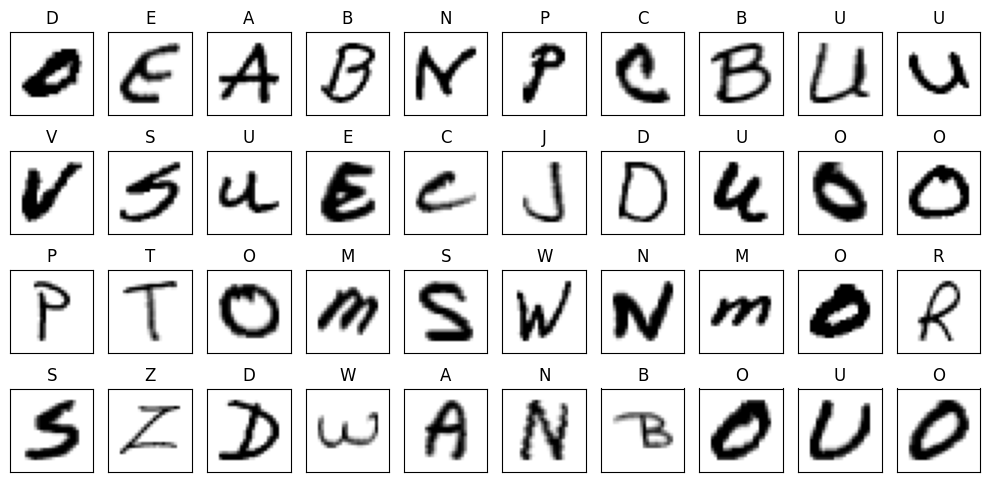

In [ ]:
#@title Visualize Dataset of Images
X = df.iloc[:,1:].to_numpy()/255
y = df.iloc[:,0].to_numpy()
rows, cols = 4, 10
fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row',
subplot_kw=dict(xticks=[], yticks=[]),
figsize=(10,5))
for row in range(rows):
  for col in range(cols):
    n = np.random.randint(372449)
    # show random samples
    im = ax[row, col].imshow(X[n].reshape((28,28)), cmap=plt.cm.gray_r)
    ax[row, col].set_title(chr(y[n]+65))

plt.tight_layout()
plt.show()

In [ ]:
# Get the unique labels (letters)
unique_labels = df.iloc[:, 0].unique()

# Initialize an empty DataFrame to store the sampled data
df2 = pd.DataFrame(columns=df.columns)

# Loop through each unique label and sample 100 rows
for idx in range(0,26):
    label_df = df[df.iloc[:, 0] == idx]
    sampled_label_df = label_df.sample(n=100, random_state=42)
    df2 = pd.concat([df2, sampled_label_df], ignore_index=True)

# Verify the resulting DataFrame
print("\nSampled DataFrame Info:")
print(df2.head())
print(df2.info())
print(df2.iloc[:, 0].value_counts())
print(df2.shape)


Sampled DataFrame Info:
   0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9  ... 0.639 0.640 0.641 0.642 0.643  \
0  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
1  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
2  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
3  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   
4  0   0   0   0   0   0   0   0   0   0  ...     0     0     0     0     0   

  0.644 0.645 0.646 0.647 0.648  
0     0     0     0     0     0  
1     0     0     0     0     0  
2     0     0     0     0     0  
3     0     0     0     0     0  
4     0     0     0     0     0  

[5 rows x 785 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 785 entries, 0 to 0.648
dtypes: object(785)
memory usage: 15.6+ MB
None
0
0     100
1     100
24    100
23    100
22    100
21    100
20    100
19    100
18    100
17    100
16    100
15   

In [ ]:
#@title Export the sampled DataFrame to a CSV file
df2.to_csv('sampled_dataset.csv', index=False)
print("Sampled dataset exported to 'sampled_dataset.csv'.")

Sampled dataset exported to 'sampled_dataset.csv'.


In [ ]:
#@title Read the New imported csv file

#import from google collab
myfile2 = "/content/drive/MyDrive/Colab Notebooks/DS 397/Machine Problem 2/sampled_dataset.csv"
df3 = pd.read_csv(myfile2)

#from Local machine
# df3 = pd.read_csv("sampled_dataset.csv")
print(df3.shape)

(2600, 785)


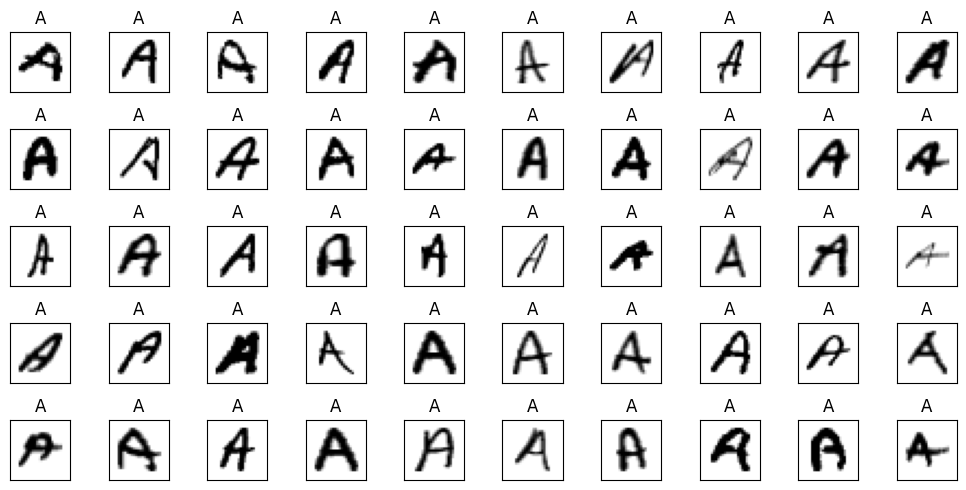

In [ ]:
#@title Visualize Dataset of Samples Images
X_sampled = df3.iloc[:,1:].to_numpy()/255
y_sampled = df3.iloc[:,0].to_numpy()
rows, cols = 5, 10
fig, ax = plt.subplots(rows, cols, sharex='col', sharey='row',
subplot_kw=dict(xticks=[], yticks=[]),
figsize=(10,5))
for row in range(rows):
  for col in range(cols):
    n = np.random.randint(df3.shape[0])
    # show random samples
    im = ax[row, col].imshow(X[n].reshape((28,28)), cmap=plt.cm.gray_r)
    ax[row, col].set_title(chr(y[n]+65))

plt.tight_layout()
plt.show()

In [ ]:
#@title Create the target names dictionary
target_names = {i: chr(65 + i) for i in range(26)}

print(df3.iloc[:,0].unique())
print(target_names)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
{0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 5: 'F', 6: 'G', 7: 'H', 8: 'I', 9: 'J', 10: 'K', 11: 'L', 12: 'M', 13: 'N', 14: 'O', 15: 'P', 16: 'Q', 17: 'R', 18: 'S', 19: 'T', 20: 'U', 21: 'V', 22: 'W', 23: 'X', 24: 'Y', 25: 'Z'}


# 1a. Dimensionality Reduction

Using principal components analysis, reduce the 784-D data set to 2-D. Visualize the latent space as a scatter plot of 2,600 points colored according to the letter of the alphabet. How much % variance is retained with only 2 principal components?

## PCA via Singular Value Decomposition

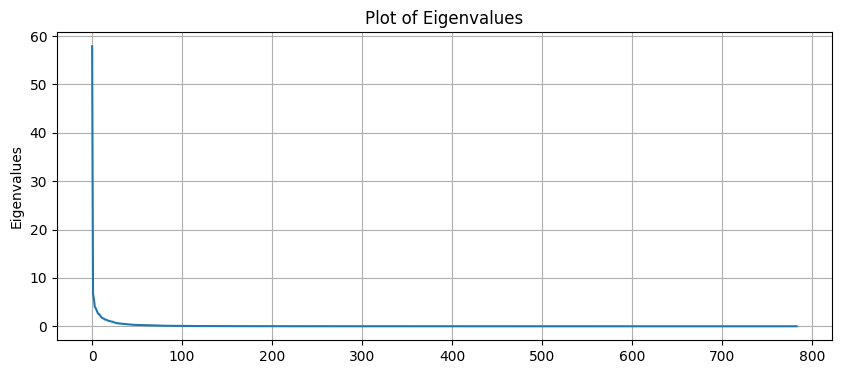

In [ ]:
#@title Principal Component Analysis with Singular Value Decomposition
m,n = X_train.shape
U,S,Vh = np.linalg.svd(X_sampled, full_matrices=False)
PC = Vh.T
eigenvals = (1/(m-1))*S**2


#Plot to See if Eigenvalues are sorted
plt.subplots(figsize=(10,4))
plt.title("Plot of Eigenvalues")
plt.plot(np.arange(0,len(eigenvals)),eigenvals, "-")
plt.ylabel("Eigenvalues")
plt.grid(True)
plt.show()

Variance Retained: 48.4386532525159 %


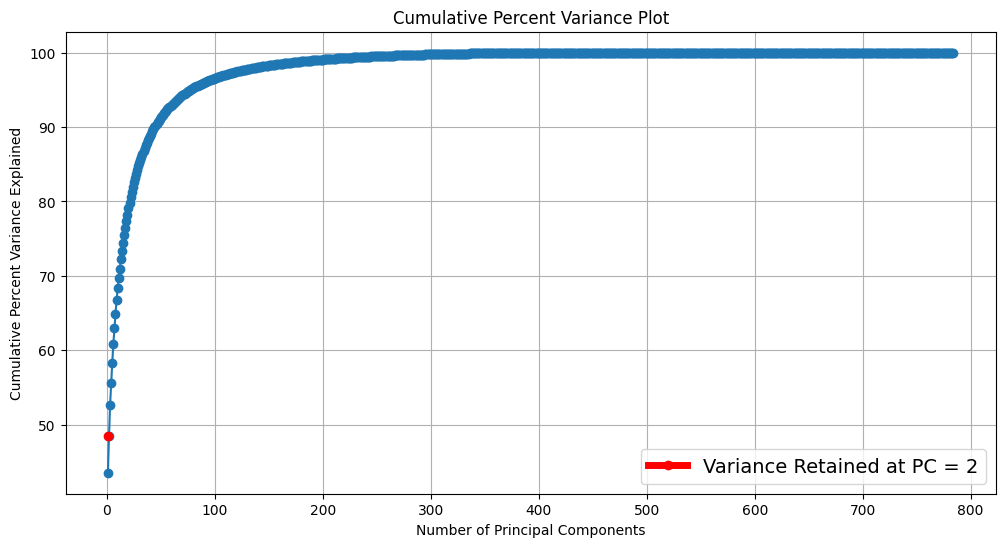

In [ ]:
#@title Cumulative Percent Variance Plot and Variance Retained

#Explained Variance
expvar = eigenvals/ np.sum(eigenvals)
S = np.cumsum(expvar)

#Cumulative Percent Variance
cpv = (np.cumsum(eigenvals) / np.sum(eigenvals)) * 100
variance_retained = (np.sum(eigenvals[:2]) / np.sum(eigenvals)) * 100

print(f"Variance Retained: {variance_retained} %")
# Plot
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(eigenvals) + 1), cpv, marker='o', linestyle='-')
for i in [2]:
  plt.plot(i-1,S[i-1]*100,color="red", marker="o", linewidth=5.0, label="Variance Retained at PC = 2")
plt.title('Cumulative Percent Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Percent Variance Explained')
plt.legend(loc="lower right", fontsize=14)
plt.grid(True)
plt.show()

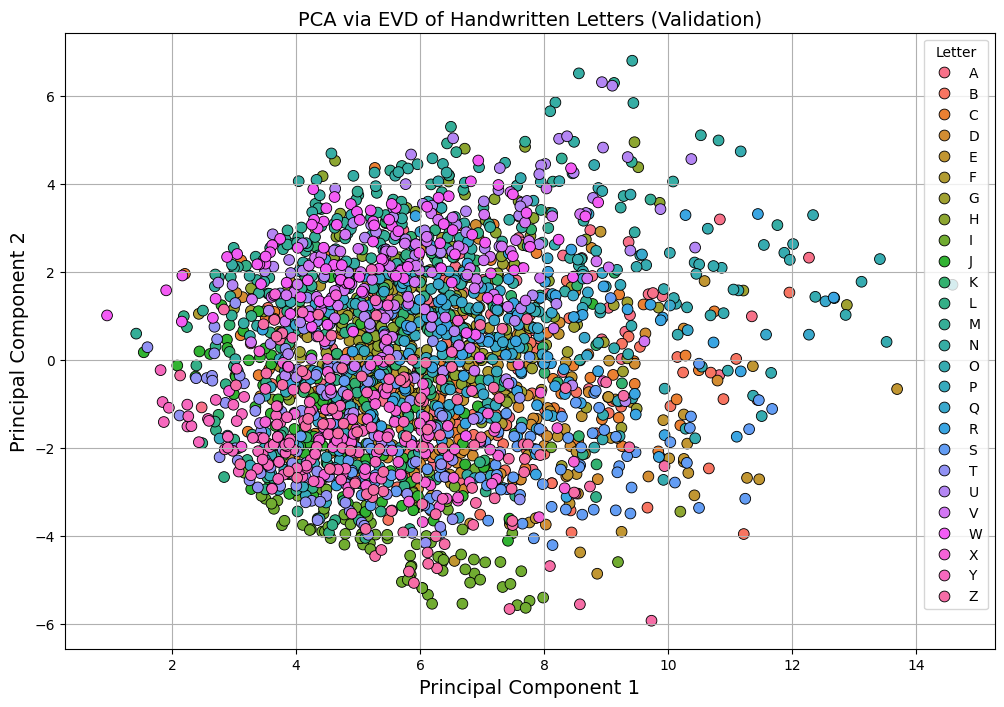

In [ ]:
#@title Project only using the first 2 principal components via Singular Value Decomposition
XPCA_svd = X_sampled @ PC[:,:2]

# Create a DataFrame for the PCA results
XPCA_svd_df = pd.DataFrame(XPCA_svd, columns=['Principal Component 1', 'Principal Component 2'])
XPCA_svd_df['Letter'] = pd.Categorical(y_sampled).map(target_names)

# Visualize the 2D latent space
plt.figure(figsize=(12, 8))
sns.scatterplot(data=XPCA_svd_df, x="Principal Component 1", y="Principal Component 2", hue="Letter", s=60, edgecolor='k')
plt.title("PCA via EVD of Handwritten Letters (Validation)", fontsize=14)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid()
plt.show()

## PCA Via Eigenvalue Decomposition

In [ ]:
#@title Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.3, random_state=0, stratify=y_sampled)

In [ ]:
#@title Principal Component Analysis with Eigenvalue Decomposition
N_train = X_train.shape[0]
C = np.dot(X_train.T, X_train) / N_train
eigvals, eigvecs = np.linalg.eig(C)
eigvals = np.real(eigvals); eigvecs = np.real(eigvecs)
print("Eigenvectors (each column):")
print(eigvecs)
print("Eigenvalues (each element):")
print(eigvals)

Eigenvectors (each column):
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Eigenvalues (each element):
[ 4.07390134e+01  4.60739200e+00  3.89071304e+00  2.75105199e+00
  2.57367566e+00  2.35849784e+00  1.98686277e+00  1.78498585e+00
  1.72988365e+00  1.52036521e+00  1.32004593e+00  1.18488066e+00
  1.13722071e+00  1.10807090e+00  9.90450677e-01  9.71269466e-01
  9.24406995e-01  8.49228746e-01  8.03518261e-01  7.88001631e-01
  7.30913818e-01  7.04161927e-01  6.69960263e-01  6.35142540e-01
  5.82853314e-01  5.43994779e-01  5.17521393e-01  4.61975499e-01
  4.42187553e-01  4.27852829e-01  4.08606571e-01  3.91421971e-01
  3.78116785e-01  3.61651017e-01  3.38176016e-01  3.32504776e-01
  3.26569691e-01  3.06349790e-01  2.94444381e-01  2.84299275e-01
  2.79379603e-01  2.64949912e-01  2.59491766e-01  2.41056416e-01
  2.33570162e-01  2.20227902e-01  2.12920429e-01  2.09414821e-01
  1.9914

Variance Retained: 48.43865325251586 %


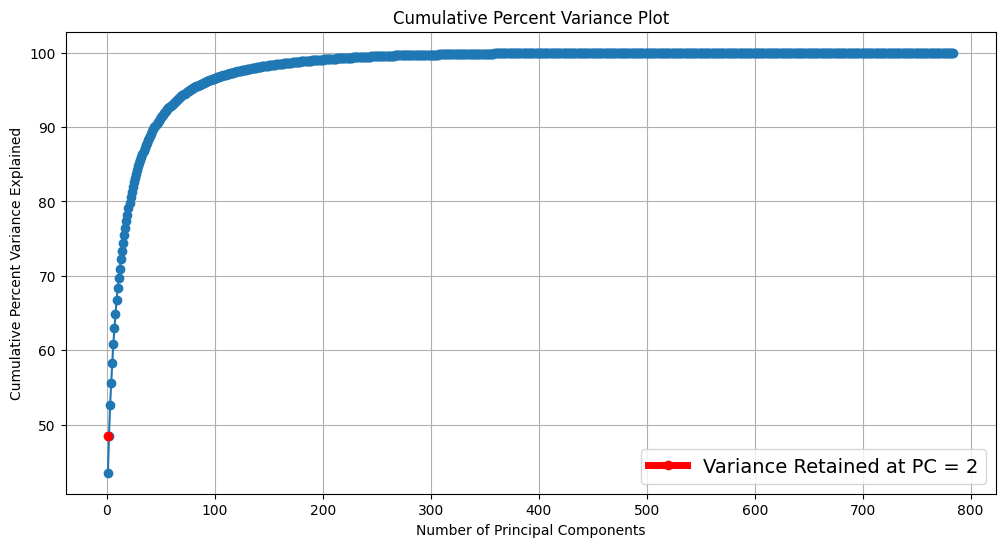

In [ ]:
s#@title Cumulative Percent Variance Plot and Variance Retained

#Explained Variance
expvar = eigvals/ np.sum(eigvals)
S = np.cumsum(expvar)

#Cumulative Percent Variance
cpv = (np.cumsum(eigvals) / np.sum(eigvals)) * 100
variance_retained = (np.sum(eigvals[:2]) / np.sum(eigvals)) * 100

print(f"Variance Retained: {variance_retained} %")
# Plot
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(eigvals) + 1), cpv, marker='o', linestyle='-')
for i in [2]:
  plt.plot(i-1,S[i-1]*100,color="red", marker="o", linewidth=5.0, label="Variance Retained at PC = 2")
plt.title('Cumulative Percent Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Percent Variance Explained')
plt.legend(loc="lower right", fontsize=14)
plt.grid(True)
plt.show()

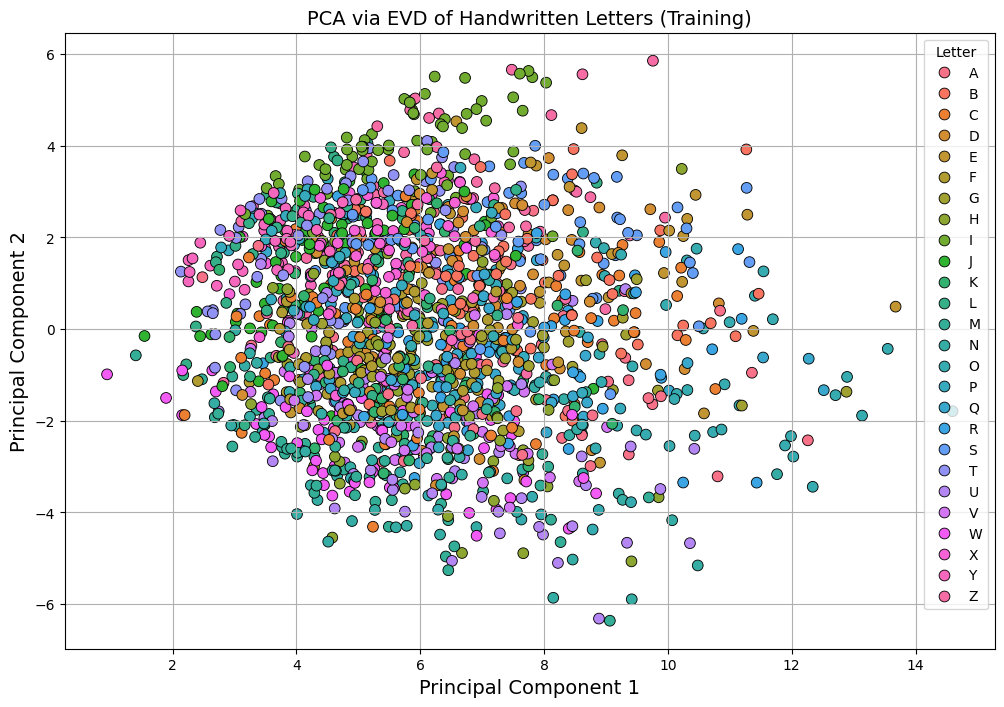

In [ ]:
#@title Project only using the first 2 principal components (eigenvectors) (training)
Xtrain_pca = X_train @ eigvecs[:,:2]

# Create a DataFrame for the PCA results
pca_df_train = pd.DataFrame(Xtrain_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df_train['Letter'] = pd.Categorical(y_train).map(target_names)

# Visualize the 2D latent space
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df_train, x="Principal Component 1", y="Principal Component 2", hue="Letter", s=60, edgecolor='k')
plt.title("PCA via EVD of Handwritten Letters (Training)", fontsize=14)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid()
plt.show()

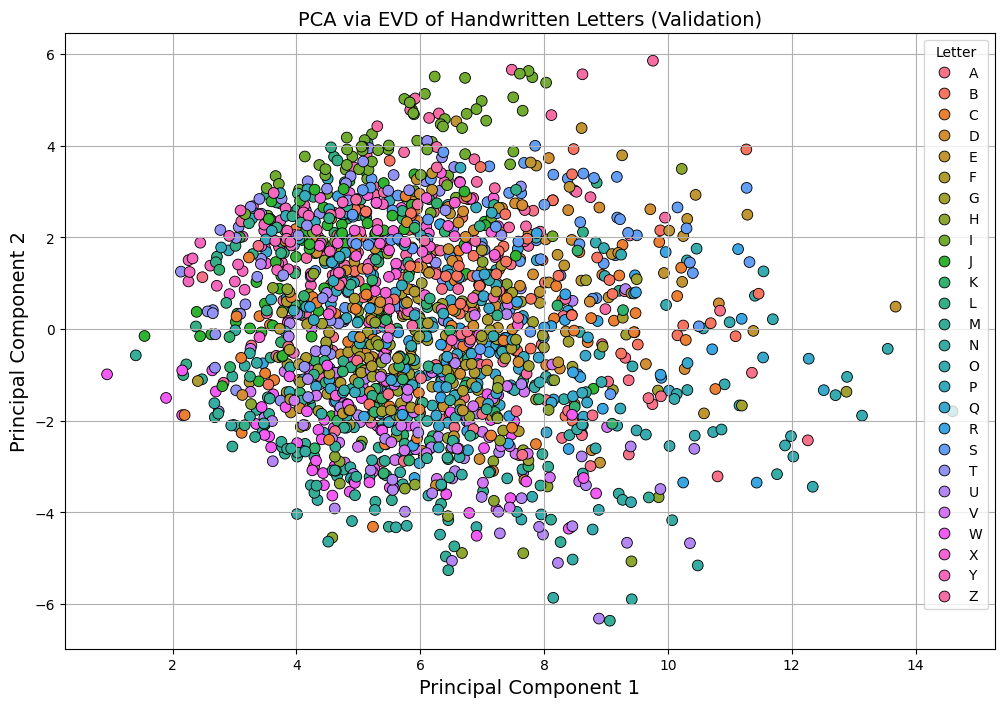

In [ ]:
#@title Project only using the first 2 principal components (eigenvectors) (validation)
Xtest_pca = X_test@ eigvecs[:,:2]

# Create a DataFrame for the PCA results
pca_df_test = pd.DataFrame(Xtest_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df_test['Letter'] = pd.Categorical(y_test).map(target_names)

# Visualize the 2D latent space
plt.figure(figsize=(12, 8))
sns.scatterplot(data=pca_df_train, x="Principal Component 1", y="Principal Component 2", hue="Letter", s=60, edgecolor='k')
plt.title("PCA via EVD of Handwritten Letters (Validation)", fontsize=14)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.grid()
plt.show()